<a href="https://colab.research.google.com/github/NustinJewman/PythonFFB/blob/main/data_munging_notes_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/74b84c5fb2371b954b52b4f67ae5220930d57861/fantasypros/fp_projections.csv')

In [2]:
rb_df = df.loc[df['Pos'] == 'RB']

rb_df.sort_values(by='ReceivingYds', ascending=False).head(10)

,Unnamed: 0,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,...,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
12,0,Christian McCaffrey,CAR,RB,102.8,855.8,4.5,2.2,252.7,1130.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.2
43,13,Austin Ekeler,LAC,RB,66.4,671.7,4.2,1.3,164.3,709.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186.3
33,5,Alvin Kamara,NO,RB,83.0,600.6,2.8,1.7,201.4,920.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.3
23,1,Saquon Barkley,NYG,RB,66.2,536.9,2.7,1.5,271.2,1237.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.6
156,35,James White,NE,RB,61.3,526.7,3.8,0.5,53.2,213.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.6
30,4,Dalvin Cook,MIN,RB,58.1,519.8,1.9,2.7,262.7,1151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,231.9
162,37,Tarik Cohen,CHI,RB,66.7,481.0,2.7,1.4,85.0,316.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.3
25,2,Ezekiel Elliott,DAL,RB,59.3,468.6,2.6,2.6,288.0,1261.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.3
38,9,Miles Sanders,PHI,RB,51.7,462.6,2.4,2.1,234.7,1050.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.5
35,6,Clyde Edwards-Helaire,KC,RB,51.0,455.1,3.1,2.2,211.2,943.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.1


In [5]:
import seaborn as sns


In [3]:
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/adp/PPR_ADP.csv', index_col=0)


In [4]:
adp_df.head(10)

,PLAYER,POS,AVG
0,Christian McCaffrey,RB,1.0
1,Saquon Barkley,RB,2.0
2,Ezekiel Elliott,RB,3.5
3,Michael Thomas,WR,4.0
4,Dalvin Cook,RB,5.0
5,Alvin Kamara,RB,5.5
6,Derrick Henry,RB,7.5
7,Davante Adams,WR,9.5
8,Joe Mixon,RB,10.0
10,Austin Ekeler,RB,12.0


In [6]:
adp_df['ADP_RANK'] = adp_df['AVG'].rank()
adp_df.head(5)

,PLAYER,POS,AVG,ADP_RANK
0,Christian McCaffrey,RB,1.0,1.0
1,Saquon Barkley,RB,2.0,2.0
2,Ezekiel Elliott,RB,3.5,3.0
3,Michael Thomas,WR,4.0,4.0
4,Dalvin Cook,RB,5.0,5.0


In [7]:
adp_df_cutoff = adp_df[:100] #limited to 100 rows. not the bums like trent taylor
adp_df_cutoff.shape

(100, 4)

In [8]:
replacement_players = {
    'RB': '',
    'WR': '',
    'QB': '',
    'TE': '',
}

for _, row in adp_df_cutoff.iterrows():
  position = row['POS']
  player = row['PLAYER']

  if position in replacement_players:
    replacement_players[position] = player

In [14]:
replacement_players

{'RB': 'Latavius Murray',
 'WR': 'Jamison Crowder',
 'QB': 'Aaron Rodgers',
 'TE': 'Rob Gronkowski'}

In [10]:
df = df[['Player', 'Pos', 'Team', 'FantasyPoints']]  #this is how to filter out columns in pandas. set new df original to df and columns you wish to keep in new df.
df.head()

,Player,Pos,Team,FantasyPoints
0,Lamar Jackson,QB,BAL,361.1
1,Patrick Mahomes,QB,KC,345.1
2,Dak Prescott,QB,DAL,318.5
3,Deshaun Watson,QB,HOU,312.7
4,Russell Wilson,QB,SEA,308.5


In [11]:
replacement_values = {}

for position, player_name in replacement_players.items():
  player = df.loc[df['Player'] == player_name]
  replacement_values[position] = player['FantasyPoints'].tolist()[0]

In [15]:
replacement_values

{'RB': 97.4, 'WR': 118.9, 'QB': 277.3, 'TE': 92.3}

In [16]:

scoring_weights = {
    'receptions': 1, # PPR
    'receiving_yds': 0.1,
    'receiving_td': 6,
    'FL': -2, #fumbles lost
    'rushing_yds': 0.1,
    'rushing_td': 6,
    'passing_yds': 0.04,
    'passing_td': 4,
    'int': -2
}
df['FantasyPoints'] = (
    df['Receptions']*scoring_weights['receptions'] + df['ReceivingYds']*scoring_weights['receiving_yds'] + \
    df['ReceivingTD']*scoring_weights['receiving_td'] + df['FL']*scoring_weights['FL'] + \
    df['RushingYds']*scoring_weights['rushing_yds'] + df['RushingTD']*scoring_weights['rushing_td'] + \
    df['PassingYds']*scoring_weights['passing_yds'] + df['PassingTD']*scoring_weights['passing_td'] + \
    df['Int']*scoring_weights['int'] )

KeyError: ignored

In [57]:
pd.set_option('chained_assignment', None)

df = df.loc[df['Pos'].isin(['QB', 'RB', 'WR', 'TE'])]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis=1)

In [58]:
df.head()

,Player,Pos,Team,FantasyPoints,Value,VOR
0,Lamar Jackson,QB,BAL,361.1,0.798717,83.8
1,Patrick Mahomes,QB,KC,345.1,0.763327,67.8
2,Dak Prescott,QB,DAL,318.5,0.704490,41.2
3,Deshaun Watson,QB,HOU,312.7,0.691661,35.4
4,Russell Wilson,QB,SEA,308.5,0.682371,31.2


In [59]:
df['VOR Rank'] = df['VOR'].rank(ascending=False)

In [27]:
df.groupby('Pos')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,89.0,0.222728,0.271520,0.000000,0.010617,0.026543,0.539704,0.798717
RB,155.0,0.541322,0.147736,0.399469,0.422362,0.481752,0.623756,1.000000
TE,128.0,0.487392,0.075257,0.409202,0.432869,0.457421,0.528534,0.765539
WR,245.0,0.462407,0.115075,0.350365,0.366291,0.409865,0.548109,0.804247


In [60]:
df['VOR'] = df['VOR'].apply(lambda x: (x-df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))
# or
# min_vor = df['VOR'].min()
# max_vor = df['VOR'].max()
# vor_range = max_vor - min_vor
# df['VOR'] = df['VOR'].apply(lambda x: (x-min_vor) / vor_range

KeyError: ignored

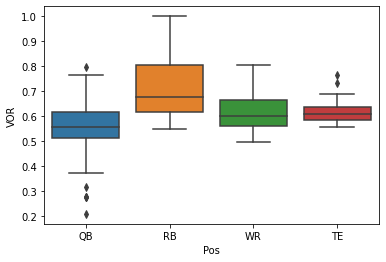

In [61]:
import seaborn as sns
num_teams = 12
num_spots = 16 # 1 QB, 2RB, 2WR, 1TE, 1FLEX, 1K, 1DST, 7 BENCH
draft_pool = num_teams * num_spots

df_copy = df[:draft_pool]

sns.boxplot(x=df_copy['Pos'], y=df_copy['VOR']);

In [62]:
gurley = df.loc[df['Player'] == 'Todd Gurley']
gurley

,Player,Pos,Team,FantasyPoints,Value,VOR,VOR Rank
48,Todd Gurley,RB,ATL,175.3,0.785667,0.785667,18.0


In [63]:

adp_df = adp_df.rename({
    'PLAYER': 'Player',
    'POS': 'Pos',
    'AVG': 'Average ADP',
    'ADP RANK': 'ADP Rank'
}, axis=1)

In [64]:
df = df.rename({
    'VOR': 'Value',
    'VOR Rank': 'Value Rank'
}, axis=1)

In [65]:
adp_df.head(10)

,Player,Pos,Average ADP,ADP_RANK
0,Christian McCaffrey,RB,1.0,1.0
1,Saquon Barkley,RB,2.0,2.0
2,Ezekiel Elliott,RB,3.5,3.0
3,Michael Thomas,WR,4.0,4.0
4,Dalvin Cook,RB,5.0,5.0
5,Alvin Kamara,RB,5.5,6.0
6,Derrick Henry,RB,7.5,7.0
7,Davante Adams,WR,9.5,8.0
8,Joe Mixon,RB,10.0,9.0
10,Austin Ekeler,RB,12.0,10.5


In [66]:
final_df = df.merge(adp_df, how='left', on=['Player', 'Pos'])

final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value,Value Rank,Average ADP,ADP_RANK
0,Lamar Jackson,QB,BAL,361.1,0.798717,0.798717,17.0,22.5,23.0
1,Patrick Mahomes,QB,KC,345.1,0.763327,0.763327,23.0,24.5,24.5
2,Dak Prescott,QB,DAL,318.5,0.704490,0.704490,38.0,58.0,57.0
3,Deshaun Watson,QB,HOU,312.7,0.691661,0.691661,41.0,67.5,67.0
4,Russell Wilson,QB,SEA,308.5,0.682371,0.682371,51.0,64.5,66.0


In [69]:
final_df['Diff in ADP and Value'] = final_df['ADP_RANK'] - final_df['Value Rank']
final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value,Value Rank,Average ADP,ADP_RANK,Diff in ADP and Value
0,Lamar Jackson,QB,BAL,361.1,0.798717,0.798717,17.0,22.5,23.0,6.0
1,Patrick Mahomes,QB,KC,345.1,0.763327,0.763327,23.0,24.5,24.5,1.5
2,Dak Prescott,QB,DAL,318.5,0.704490,0.704490,38.0,58.0,57.0,19.0
3,Deshaun Watson,QB,HOU,312.7,0.691661,0.691661,41.0,67.5,67.0,26.0
4,Russell Wilson,QB,SEA,308.5,0.682371,0.682371,51.0,64.5,66.0,15.0


In [71]:
draft_pool = final_df.sort_values(by='ADP_RANK')[:196]

rb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'RB']
qb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'QB']
wr_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'WR']
te_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'TE']

In [72]:
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value,Value Rank,Average ADP,ADP_RANK,Diff in ADP and Value
106,Ryquell Armstead,RB,JAC,116.7,0.656050,0.656050,67.0,138.5,136.0,69.0
133,Adrian Peterson,RB,WAS,99.0,0.616899,0.616899,93.0,147.0,147.0,54.0
66,Ronald Jones II,RB,TB,148.6,0.726609,0.726609,29.0,83.0,78.0,49.0
99,Marlon Mack,RB,IND,123.9,0.671975,0.671975,55.0,98.0,96.0,41.0
102,Kerryon Johnson,RB,DET,122.6,0.669100,0.669100,58.0,100.0,98.5,40.5
188,Darrynton Evans,RB,TEN,68.5,0.549436,0.549436,159.0,193.5,191.0,32.0
126,Tevin Coleman,RB,SF,104.4,0.628843,0.628843,83.0,110.0,112.0,29.0
151,Antonio Gibson,RB,WAS,90.9,0.598983,0.598983,111.0,141.0,140.0,29.0
207,Joshua Kelley,RB,LAC,61.1,0.533068,0.533068,184.5,208.0,210.0,25.5
131,Zack Moss,RB,BUF,100.8,0.620880,0.620880,91.0,118.5,116.0,25.0


In [74]:
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value,Value Rank,Average ADP,ADP_RANK,Diff in ADP and Value
294,Justice Hill,RB,BAL,28.9,0.461845,0.461845,268.0,202.0,200.0,-68.0
309,Jaylen Samuels,RB,PIT,25.8,0.454988,0.454988,280.0,214.0,216.0,-64.0
237,Rashaad Penny,RB,SEA,47.1,0.502101,0.502101,212.0,181.0,179.0,-33.0
255,Anthony McFarland Jr.,RB,PIT,39.2,0.484627,0.484627,234.0,206.0,207.5,-26.5
166,Ke'Shawn Vaughn,RB,TB,81.0,0.577085,0.577085,133.0,108.5,110.0,-23.0
186,Nyheim Hines,RB,IND,70.0,0.552754,0.552754,158.0,140.5,139.0,-19.0
165,Alexander Mattison,RB,MIN,82.0,0.579297,0.579297,131.0,123.0,118.0,-13.0
183,Chase Edmonds,RB,ARI,71.0,0.554966,0.554966,156.0,144.5,144.0,-12.0
221,LeSean McCoy,RB,TB,55.4,0.520460,0.520460,195.0,185.0,184.0,-11.0
123,James White,RB,NE,105.6,0.631497,0.631497,82.0,75.5,74.0,-8.0
